<a href="https://colab.research.google.com/github/loki20051267/NLP/blob/main/NLP_Aug29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/tmp/ipython-input-1664109418.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB
None
   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...   

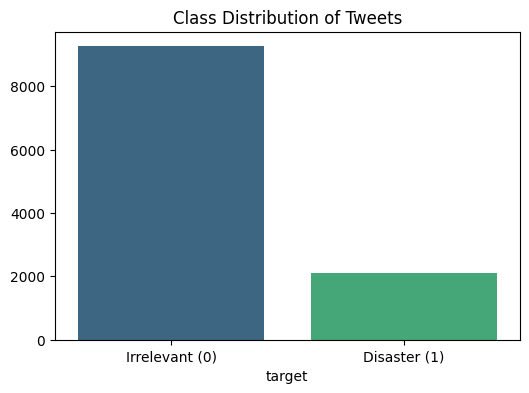

Disaster Tweets:
['Chinese woman with mystery virus quarantined in Thailand. https://t.co/zALDWrbYDl'
 'Roo was found by a member of the public as a new born lamb alone covered in afterbirth. He was whisked away to a wi… https://t.co/rjd7omweqC'
 'Gauteng Helicopter Emergency Medical Services: Netcare 7 a specialised helicopter ambulance has been activated for… https://t.co/rZrJVN7Q5p']

Irrelevant Tweets:
['I wonder who’s Rick or Ricky because that dude is bleeding!!!'
 '"We did 15 minutes on it in the morning, that’s about it" ⏱ Kevin De Bruyne reveals Guardiola’s quarter-hour masterplan t…'
 'All these commenets about the joke. Yo the Volcano exploding isnt the god dang joke. Taal Volcano is real and I hop… https://t.co/rdTf99WhFf']
Original: How many illegal buildings should be demolished in our city. In the Guadalajara of Enrique Alfaro, the mitigation… https://t.co/Wx8RhTIzmZ
Stemmed: ['how', 'mani', 'illeg', 'build', 'should', 'be', 'demolish', 'in', 'our', 'citi', 'in', 'the', 

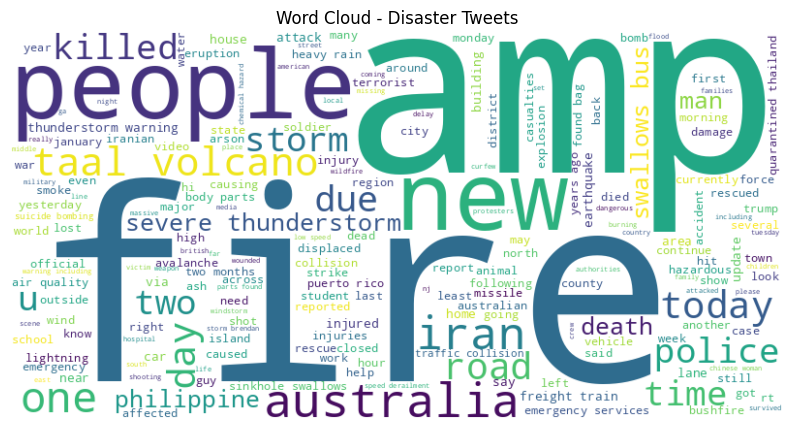

/tmp/ipython-input-1664109418.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Bigram", data=bigram_df, palette="magma")


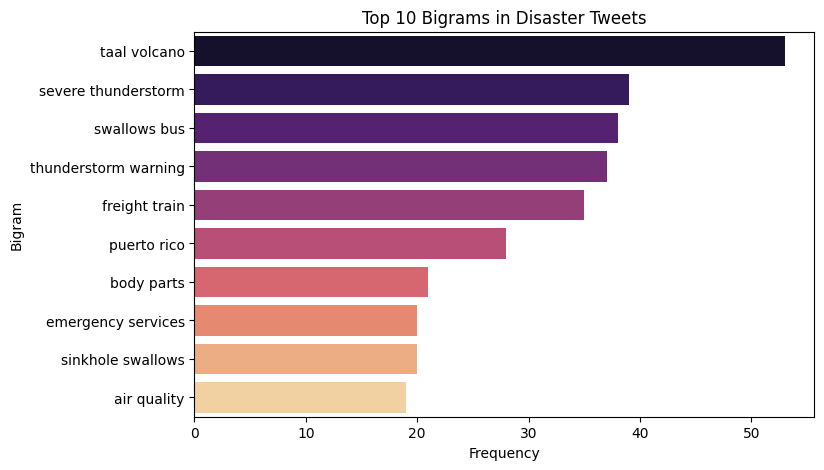

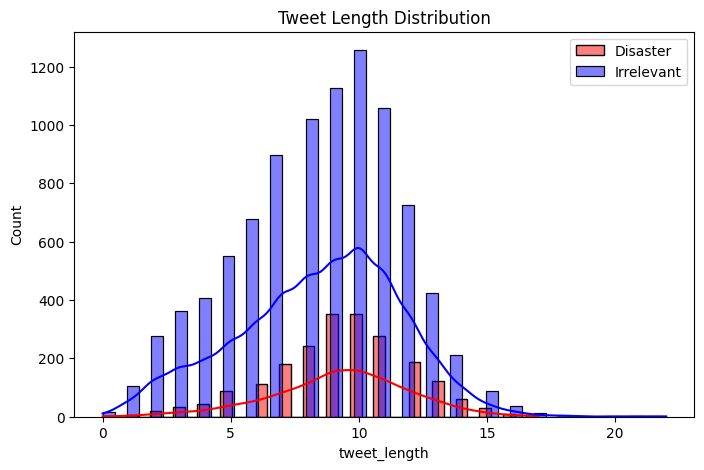

Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1878
           1       0.85      0.39      0.54       396

    accuracy                           0.88      2274
   macro avg       0.87      0.69      0.73      2274
weighted avg       0.88      0.88      0.86      2274


Random Forest
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1878
           1       0.88      0.44      0.59       396

    accuracy                           0.89      2274
   macro avg       0.89      0.72      0.76      2274
weighted avg       0.89      0.89      0.88      2274



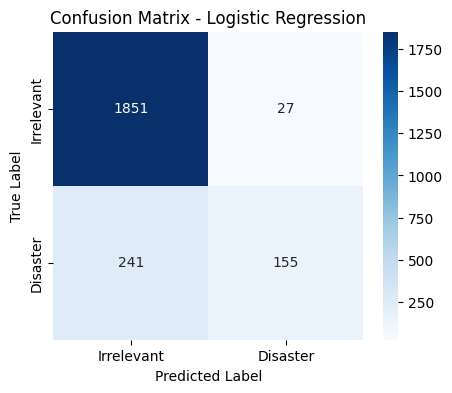

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from nltk.util import ngrams
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing resource

df = pd.read_csv("tweets.csv")

print(df.info())
print(df.head())

class_counts = df['target'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks([0,1], ["Irrelevant (0)", "Disaster (1)"])
plt.title("Class Distribution of Tweets")
plt.show()

print("Disaster Tweets:")
print(df[df['target']==1]['text'].sample(3).values)
print("\nIrrelevant Tweets:")
print(df[df['target']==0]['text'].sample(3).values)

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    text = re.sub(r'(.)\1{2,}', r'\1\1', ' '.join(tokens))
    return text.split()

df['clean_tokens'] = df['text'].apply(clean_text)

sample_texts = df['text'].sample(5, random_state=42).values
for t in sample_texts:
    tokens = nltk.word_tokenize(t.lower())
    stemmed = [stemmer.stem(w) for w in tokens if w.isalpha()]
    lemmatized = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha()]
    print(f"Original: {t}\nStemmed: {stemmed}\nLemmatized: {lemmatized}\n")

disaster_words = df[df['target']==1]['clean_tokens'].sum()
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(disaster_words))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Disaster Tweets")
plt.show()

bigrams = list(ngrams(disaster_words, 2))
bigram_freq = Counter(bigrams).most_common(10)
bigram_df = pd.DataFrame(bigram_freq, columns=["Bigram","Frequency"])
bigram_df["Bigram"] = bigram_df["Bigram"].apply(lambda x: " ".join(x))
plt.figure(figsize=(8,5))
sns.barplot(x="Frequency", y="Bigram", data=bigram_df, palette="magma")
plt.title("Top 10 Bigrams in Disaster Tweets")
plt.show()

df['tweet_length'] = df['clean_tokens'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df[df['target']==1]['tweet_length'], color="red", label="Disaster", kde=True)
sns.histplot(df[df['target']==0]['tweet_length'], color="blue", label="Irrelevant", kde=True)
plt.legend()
plt.title("Tweet Length Distribution")
plt.show()

vectorizer = TfidfVectorizer(max_features=7000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['text'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train) # Corrected from y_test to y_train
y_pred_rf = rf.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))

best_model = lr
y_pred_best = y_pred_lr

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Irrelevant","Disaster"], yticklabels=["Irrelevant","Disaster"])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()